# WITH PANDAS AND MATPLOTLIB

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [84]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [85]:
kill.shape

(2535, 14)

In [5]:
kill["gender"].unique()

array(['M', 'F'], dtype=object)

In [6]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [86]:
gender = kill.groupby("gender").sum().index   
gender

Index(['F', 'M'], dtype='object', name='gender')

In [87]:
total_person= list(kill.groupby("gender")["id"].count())
total_person

[107, 2428]

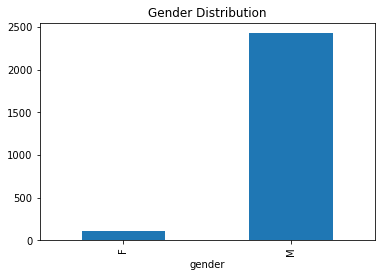

In [88]:
fig, ax = plt.subplots(figsize=(6,4))

kill.groupby("gender")["id"].count().plot.bar(x="gender", y="id", width=0.5)
plt.title("Gender Distribution");

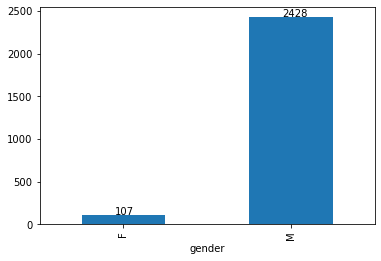

In [4]:
gender = kill.groupby("gender").sum().index
gender
total_person= list(kill.groupby("gender")["id"].count())
total_person
fig, ax = plt.subplots(figsize=(6,4))

ax = kill.groupby("gender")["id"].count().plot(x="gender", y="id", kind = "bar")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+2));

Text(0.5, 1.0, 'Gender Distribution')

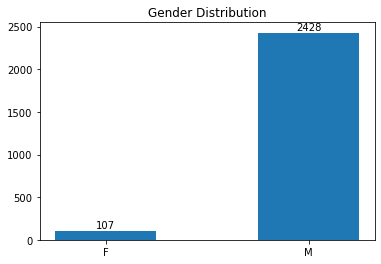

In [89]:
gender = kill.groupby("gender").sum().index
gender
total_person= list(kill.groupby("gender")["id"].count())
total_person
fig, ax = plt.subplots(figsize=(6,4))

# Plot the bar graph
plot = plt.bar(gender, total_person, width=0.5)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
plt.title("Gender Distribution")

## 2: Plot 7 most common kill weapons

In [127]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [19]:
common_weapons = kill["armed"].value_counts()[:7]
common_weapons 

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [20]:
weapon = kill["armed"].value_counts().index[:7]
weapon

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object')

Text(0, 0.5, '')

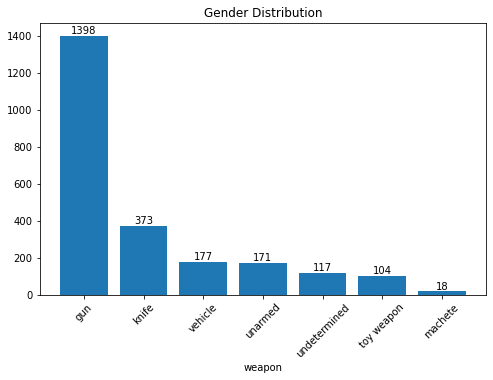

In [21]:
fig, ax = plt.subplots(figsize=(8,5))


plot= ax.bar(weapon, common_weapons)
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45)

# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.title("Gender Distribution")
plt.xlabel("weapon")
plt.ylabel("")

## 3: Plot number of age of killed people under three groups : Under 25 and Above 25, others

In [7]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
def age_cat(age_t):
    if age_t >= 25:
        return "above25"
    elif age_t < 25 :
        return "below25"
    else:
        return "other"
   


In [6]:
kill["age_cat"] = kill.age.apply(lambda age: age_cat(age))

In [7]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
2240,2494,TK TK,10/04/17,shot,gun,39.0,M,NaN,Houston,TX,False,other,Foot,True,above25
1625,1815,Jerry Lee Jackson,25/08/16,shot and Tasered,knife,63.0,M,NaN,Fort Collins,CO,False,other,Not fleeing,True,above25
2365,2624,Charles Darnell Baker,02/06/17,shot,gun,29.0,M,B,Abbeville,AL,False,attack,Not fleeing,False,above25
1584,1775,Ronald Smith,09/08/16,shot,gun,45.0,M,W,Circleville,OH,True,other,Not fleeing,False,above25
1592,1832,Eric Ortega Soto,13/08/16,shot,vehicle,36.0,M,H,Hayward,CA,False,other,Car,False,above25


In [8]:
age_class = kill.age_cat.value_counts()
age_class

above25    2008
below25     450
other        77
Name: age_cat, dtype: int64

In [10]:
age_class2 = kill.age_cat.value_counts().index
age_class2

Index(['above25', 'below25', 'other'], dtype='object')

Text(0.5, 0, 'age_cat')

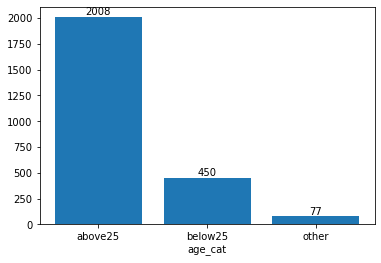

In [33]:

fig, ax = plt.subplots(figsize=(6,4))

plot= ax.bar(age_class2, age_class)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0 )

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2,
            1.002*height,'%d' % int(height), ha='center', va='bottom')

#plt.title("Age Distribution")
plt.xlabel("age_cat")
#plt.ylabel("")

## 4: Plot number of killed poeple by race

In [8]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [10]:
race_k = kill["race"].value_counts().index[:7]
race_k

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

Text(0, 0.5, '')

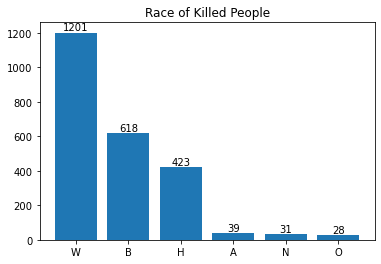

In [25]:
# with matplotlib
fig, ax = plt.subplots()

plot= ax.bar(race_k, race_freq)

# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.title("Race of Killed People")
plt.xlabel("")
plt.ylabel("")



## 5: Killed People According to Races (Pie Chart)

In [51]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [52]:
kill.shape

(2535, 14)

In [ ]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [29]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [53]:
kill.dropna(axis=0, how="any", thresh=None, inplace=True) 


In [54]:
kill.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [55]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [59]:
race_die = kill["race"].value_counts()[:7]
race_die 

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [56]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [57]:
sizes=kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

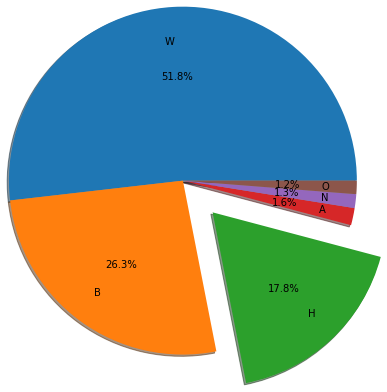

In [80]:
plt.axis("equal")
plt.pie(race_die, labels=labels, radius=2,autopct="%0.1f%%",shadow=True, explode=[0,0,0.5,0,0,0], pctdistance=0.6,
        labeldistance=0.8)
plt.show